# System Modelling

Author : Masuk  
Help   : Nishi, Rafee

In [1]:
# Make sure lenstronomy is installed, otherwise install the latest pip version
# try:
#     import lenstronomy
# except ImportError:
#     !pip install lenstronomy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for lenstronomy: filename=lenstronomy-1.11.2-py3-none-any.whl size=1086841 sha256=0ec1a5abb5f016118b85d12333c31d2c1d3daca62fff486ad377f2270799e895
  Stored in directory: /root/.cache/pip/wheels/1c/62/fa/1c6f5bd9f9e9e37978c5ef811810e69118ea87f2a1cd0b946d
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15728 sha256=88f6f53bc3c4797530eaa4f07fac613e4712b89ce8b17d8355a82c3dc631e063
  Stored in directory: /root/.cache/pip/wheels/4a/ea/3e/b79646d96eaea548b8eec6d2caed656a3c7f17ce5f264484b8
Successfully built lenstronomy schwimmbad


## Import of standard python libraries

In [2]:
import h5py  # library to work with '.h5' files
import joblib
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Util import mask_util, util
from lenstronomy.Workflow.fitting_sequence import FittingSequence

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## Load imaging and psf data

In [3]:
with h5py.File("/DESIJ1421-0022_F140W.h5", "r") as f:  # loading image data
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]

kwargs_data

{'background_rms': 0.016322818764336215,
 'dec_at_xy_0': -5.639999999999994,
 'exposure_time': array([[392.5919 , 429.8496 , 477.49698, ..., 417.0545 , 626.3687 ,
         470.51013],
        [537.5037 , 481.4545 , 402.75043, ..., 445.28027, 411.41382,
         414.60626],
        [441.50906, 430.91473, 528.3243 , ..., 582.93396, 452.38983,
         456.0343 ],
        ...,
        [455.4104 , 487.22336, 492.4171 , ..., 564.8773 , 450.29538,
         395.7962 ],
        [509.2898 , 384.29117, 459.5256 , ..., 396.0305 , 487.2688 ,
         570.89014],
        [438.19513, 478.61502, 508.9901 , ..., 350.71753, 400.08707,
         430.7757 ]], dtype=float32),
 'image_data': array([[-0.00921469, -0.02078328,  0.00167325, ..., -0.0132964 ,
         -0.03175444, -0.01695797],
        [-0.00559985, -0.01327114, -0.00524183, ...,  0.00243682,
         -0.00851916, -0.01378721],
        [ 0.00427728, -0.00057159, -0.02292269, ..., -0.01166504,
         -0.00735005, -0.00661949],
        ...,
   

In [4]:
with h5py.File("/psf_F140W.h5", "r") as f:  # loading psf data
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf["psf_type"] = "PIXEL"
kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

/tmp/ipykernel_20/746742490.py:7: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
/tmp/ipykernel_20/746742490.py:10: RuntimeWarning: invalid value encountered in log10
  axes[1].imshow(np.log10(image), origin="lower", cmap="cubehelix")


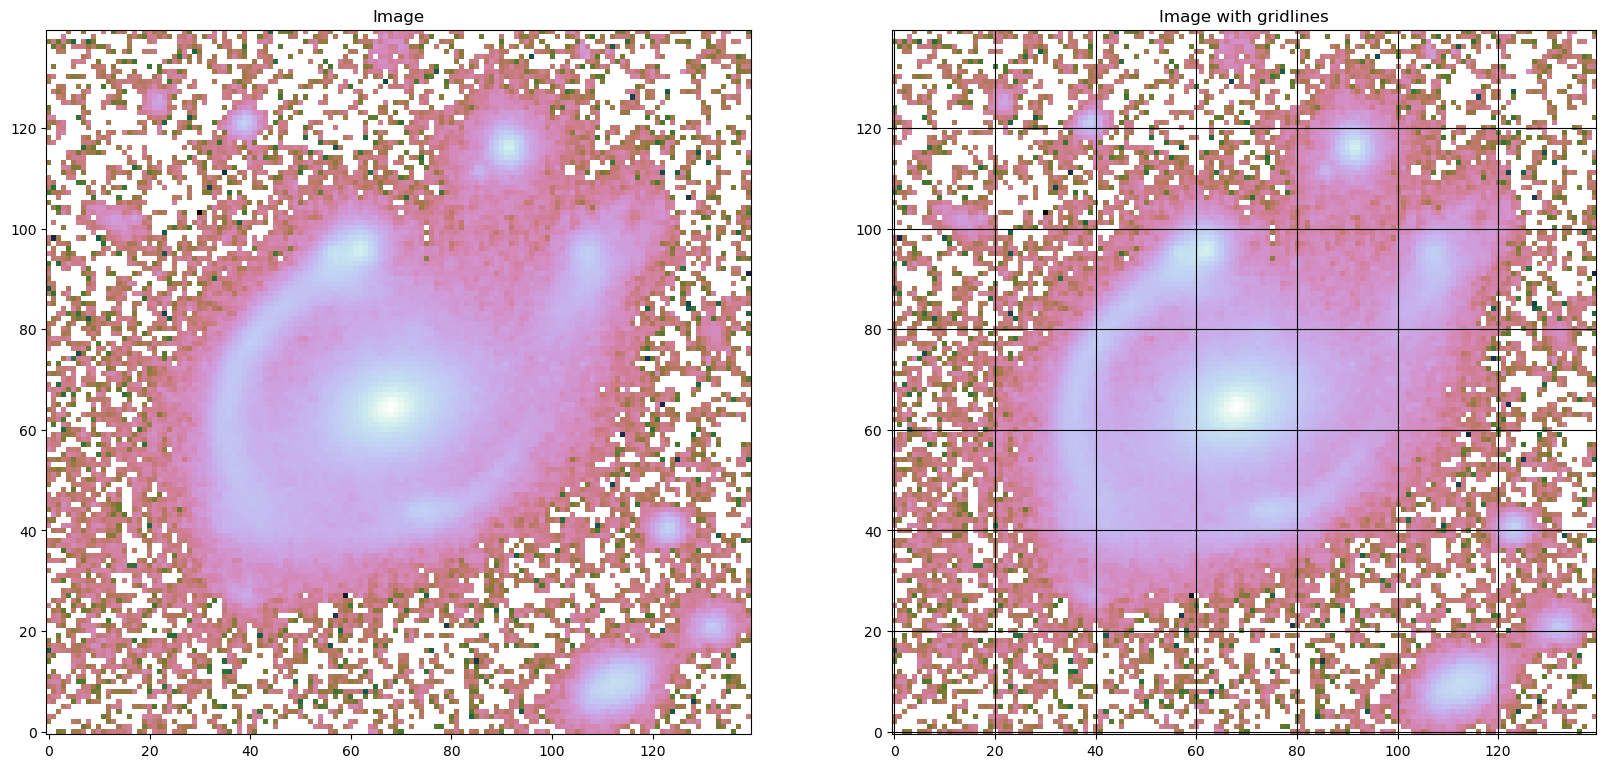

In [5]:
# extracting image_data from kwargs_data
image = kwargs_data["image_data"]

# Make the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].set_title("Image")

axes[1].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[1].set_title("Image with gridlines")
axes[1].grid(True, color="black")

# Show the plots
plt.show()

## Masking

In [6]:
ra_at_xy_0 = kwargs_data["ra_at_xy_0"]
dec_at_xy_0 = kwargs_data["dec_at_xy_0"]
transform_pix2angle = kwargs_data["transform_pix2angle"]

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(image)

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

a = 5.5  # arcsecond (1.6 arcsec = 20 pix)
b = 4.4
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra,
    lens_center_dec,
    a,
    b,
    -np.pi / 4,
)

# 11 o' clock
# mask_ext1 = mask_util.mask_ellipse(
#     util.image2array(x_coords),
#     util.image2array(y_coords),
#     lens_center_ra + 0.8,
#     lens_center_dec + 2,
#     0.7,
#     0.7,
#     -np.pi / 6,
# )

# mask_ext1 = mask_util.mask_center_2d(lens_center_ra+0.8,
#                                       lens_center_dec+2.1,
#                                       0.5,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 1 o' clock
mask_ext2 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 1.6,
    lens_center_dec + 3.6,
    1.1,
    1.0,
    -np.pi / 6,
)


# mask_ext2 = mask_util.mask_center_2d(lens_center_ra-1.6,
#                                       lens_center_dec+3.7,
#                                       0.5,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 2 o' clock
mask_ext3 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 2.9,
    lens_center_dec + 1.8,
    1.6,
    0.9,
    -np.pi / 3,
)

# mask_ext3 = mask_util.mask_center_2d(lens_center_ra-2.9,
#                                       lens_center_dec+1.8,
#                                       0.4,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 5 o' clock
mask_ext4 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 1,
    lens_center_dec - 1.8,
    1.9,
    0.5,
    -np.pi / 6,
)

# mask_ext4 = mask_util.mask_center_2d(lens_center_ra-0.5,
#                                       lens_center_dec-2.1,
#                                       0.3,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 7 o' clock
mask_ext5 = mask_util.mask_center_2d(
    lens_center_ra + 2.5,
    lens_center_dec - 3.4,
    0.4,
    util.image2array(x_coords),
    util.image2array(y_coords),
)

# 8 o' clock
mask_ext6 = mask_util.mask_ellipse(util.image2array(x_coords),
                                  util.image2array(y_coords),
                                  lens_center_ra+2.8,
                                  lens_center_dec-2.2,
                                  0.5, 0.3, np.pi/4)


mask = mask_outer
# mask = mask * (1 - mask_ext1)
mask = mask * (1 - mask_ext2)
mask = mask * (1 - mask_ext3)
mask = mask * (1 - mask_ext4)
mask = mask * mask_ext5
mask = mask * (1 - mask_ext6)

mask[mask >= 1] = 1
mask[mask < 0] = 0

/tmp/ipykernel_20/3723066894.py:4: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
/tmp/ipykernel_20/3723066894.py:14: RuntimeWarning: divide by zero encountered in log10
  image_after_mask = np.log10(image * mask)
/tmp/ipykernel_20/3723066894.py:14: RuntimeWarning: invalid value encountered in log10
  image_after_mask = np.log10(image * mask)


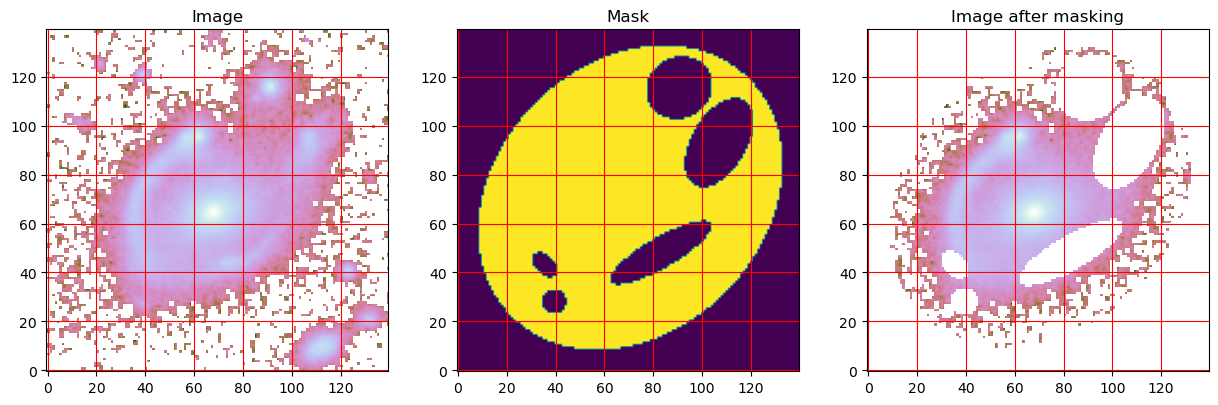

In [7]:
# Setting the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].grid(True, color="red")
axes[0].set_title("Image")

mask = mask.reshape(num_pix, num_pix)

axes[1].imshow(mask, origin="lower")
axes[1].grid(True, color="red")
axes[1].set_title("Mask")

image_after_mask = np.log10(image * mask)

axes[2].imshow(image_after_mask, origin="lower", cmap="cubehelix")
axes[2].grid(True, color="red")
axes[2].set_title("Image after masking")


# Show the plots
plt.show()

## Building a lens model

In [8]:
# adding shear into lens_model_list
lens_model_list = ["EPL", "SHEAR"]
# adding shapelets into source_model_list
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE", "SERSIC_ELLIPSE"]

### Lens galaxy's mass model

In [9]:
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({"gamma": 2.0})

fixed_lens.append({"ra_0": 0, "dec_0": 0})

kwargs_lens_init.append(
    {"theta_E": 2.0, 
     "gamma": 2.0, 
     "e1": 0.0, 
     "e2": 0.0, 
     "center_x": 0.0, 
     "center_y": 0.0}
)

kwargs_lens_sigma.append(
    {
        "theta_E": 0.01,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)

kwargs_lower_lens.append(
    {
        "theta_E": 1.5,
        "gamma": 1.8,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)

kwargs_upper_lens.append(
    {"theta_E": 3.0, 
     "gamma": 2.5, 
     "e1": 0.5, 
     "e2": 0.5, 
     "center_x": 10, 
     "center_y": 10}
)


kwargs_lens_init.append({"gamma1": 0, 
                         "gamma2": 0, 
                         "ra_0": 0, 
                         "dec_0": 0})

kwargs_lens_sigma.append({"gamma1": 0.01, 
                          "gamma2": 0.01, 
                          "ra_0": 0.01, 
                          "dec_0": 0.01})

kwargs_lower_lens.append({"gamma1": -0.3, 
                          "gamma2": -0.3, 
                          "ra_0": -2, 
                          "dec_0": -2})

kwargs_upper_lens.append({"gamma1": 0.3, 
                          "gamma2": 0.3, 
                          "ra_0": 2, 
                          "dec_0": 2})


lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]

### Lens galaxy's light model

In [10]:
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_init.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 2,
        "e1": 0,
        "e2": 0,
        "center_x": 0.0,
        "center_y": 0,
        "amp": 1,
    }
)

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.01,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)


fixed_lens_light.append({"n_sersic": 1.0})

kwargs_lens_light_init.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 2,
        "e1": 0,
        "e2": 0,
        "center_x": 0.0,
        "center_y": 0,
        "amp": 1,
    }
)

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.01,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)


joint_lens_light_with_lens_light = [[0, 1, ["center_x", "center_y"]]]


lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]

### Source galaxy's light model

In [11]:
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({"n_sersic": 1.0})

kwargs_source_init.append(
    {
        "R_sersic": 0.1,
        "n_sersic": 1,
        "e1": 0,
        "e2": 0,
        "center_x": 0.0,
        "center_y": 0,
        "amp": 5,
    }
)

kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.01,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)

kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.2,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)


fixed_source.append({"n_max": 10})

kwargs_source_init.append({"beta": 0.1, 
                           "n_max": 10, 
                           "center_x": 0.0, 
                           "center_y": 0.0})

kwargs_source_sigma.append({"beta": 0.001, 
                            "n_max": 0.1, 
                            "center_x": 0.2, 
                            "center_y": 0.2})

kwargs_lower_source.append({"beta": 0.01, 
                            "n_max": 5, 
                            "center_x": -10, 
                            "center_y": -10})

kwargs_upper_source.append({"beta": 0.2, 
                            "n_max": 8, 
                            "center_x": 10, 
                            "center_y": 10})


joint_centroid = [[0, 1, ["center_x", "center_y"]]]


source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

### Combining all the above specification in the `kwargs_params` dictionary

In [12]:
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {
    "joint_lens_light_with_lens_light": joint_lens_light_with_lens_light,
    "joint_source_with_source": joint_centroid,
}

### Numerical settings

In [13]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

# Oversample the image plane by 2 when computing
# the lensed image for better accuracy
kwargs_numerics = {"supersampling_factor": 2, "supersampling_convolution": False}

### Combining all the information to be sent to lenstronomy

In [14]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band",
}

## Here the model fitting is done

In [15]:
# using Particle Swarm Optimization
fitting_kwargs_list = [
    ["PSO", {"sigma_scale": 1.0, "n_particles": 200, "n_iterations": 120}]
]
# ['MCMC', {'n_burn': 200, 'n_run': 600, 'n_walkers':
# 200, 'sigma_scale': .1}]

# fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200,
#                                 'n_iterations': 100}],
#                       ]


fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    mpi=False,
    verbose=True,
)

input_ = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
]

fit_output = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)
multi_band_list_out = fitting_seq.multi_band_list

kwargs_fixed_out = fitting_seq._updateManager.fixed_kwargs
output_ = [
    kwargs_result,
    multi_band_list_out,
    fit_output,
    kwargs_fixed_out,
]


# chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
# kwargs_result = fitting_seq.best_fit(bijective=False)

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
Max iteration reached! Stopping.
-1.1123514313139826 reduced X^2 of best position
-5512.257517876441 log likelihood
9911 effective number of data points
[{'theta_E': 2.0655029043797235, 'gamma': 2.0, 'e1': 0.019582415392759248, 'e2': 0.2840413255581959, 'center_x': 0.5143740147334736, 'center_y': -1.0212151019976534}, {'gamma1': -0.09279939160258731, 'gamma2': 0.09382779885608228, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.19308409997701032, 'n_sersic': 1.0, 'e1': -0.09090936463987793, 'e2': -0.2602967248406064, 'center_x': 0.8931521993018277, 'center_y': -0.4691400540001096}, {'amp': 1, 'n_max': 10, 'beta': 0.11198472096394312, 'center_x': 0.8931521993018277, 'center_y': -0.4691400540001096}] source result
[{'amp': 1, 'R_sersic': 0.7288587709872819, 'n_sersic': 4.0, 'e1': 0.1471597564390729, 'e2': -0.20232216588220323, 'center_x': 0.188755666885209, 'center_y': -0.4821486927757755}, {'amp': 1, 'R_sersic': 

## Saving the output file

In [16]:
output_path = "/DESIJ1421_0022_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input_, output_], f, compress=True)

## Visualizing the fitted model

-1.1023412663505912 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.102341266350585


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/tmp/ipykernel_20/1142316746.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


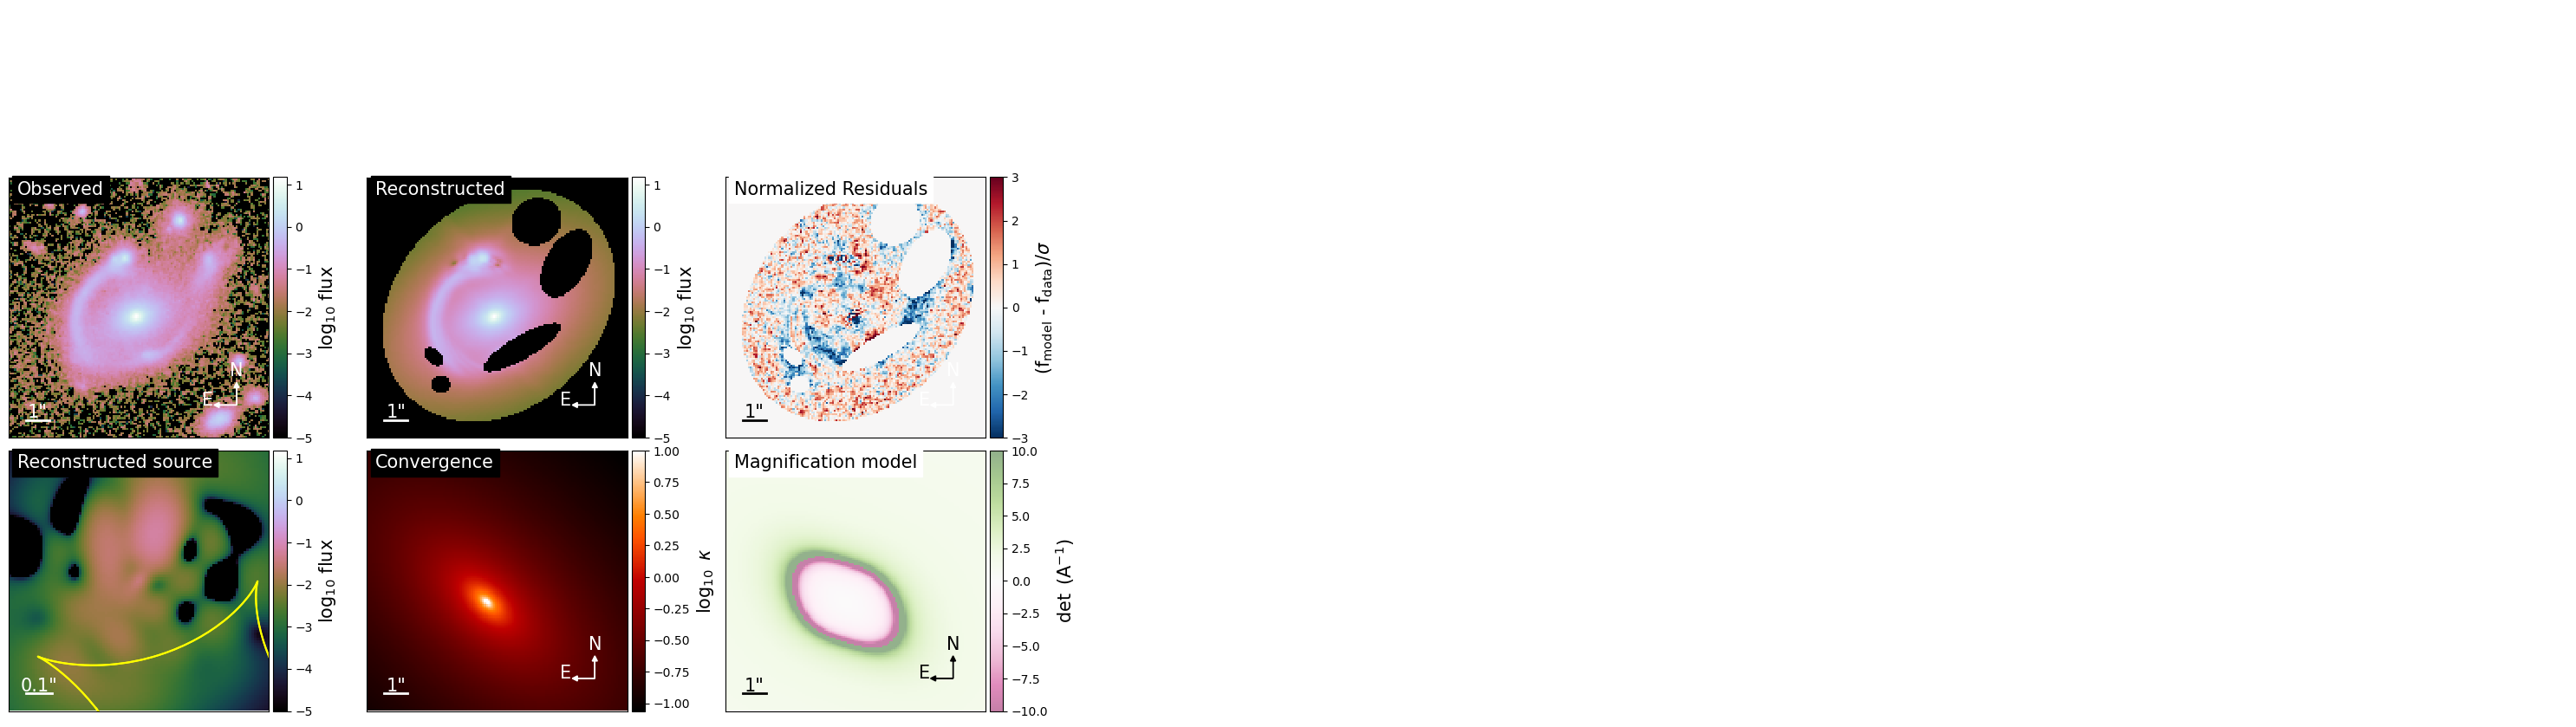

/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:511: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


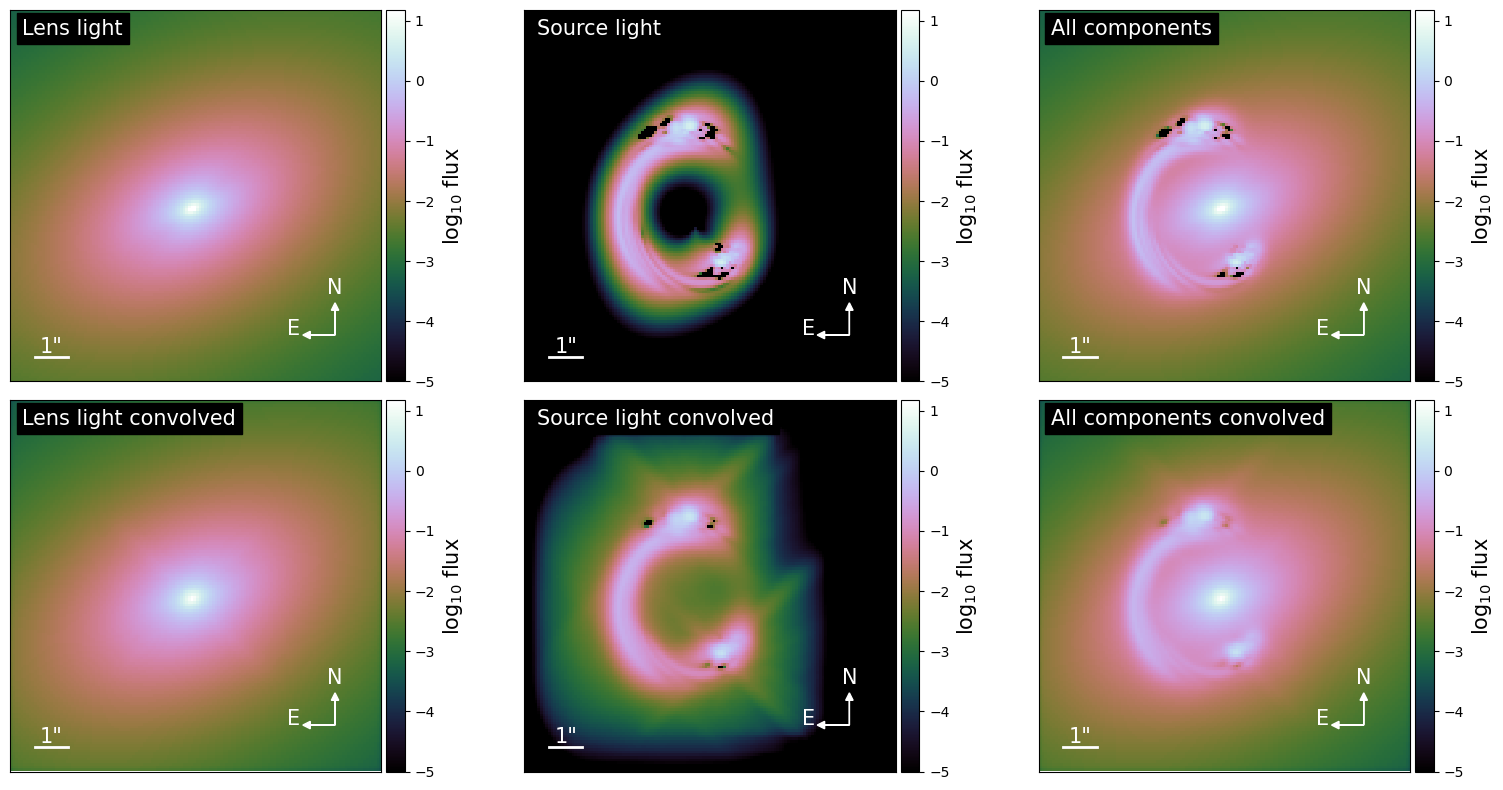

{'kwargs_lens': [{'theta_E': 2.0655029043797235, 'gamma': 2.0, 'e1': 0.019582415392759248, 'e2': 0.2840413255581959, 'center_x': 0.5143740147334736, 'center_y': -1.0212151019976534}, {'gamma1': -0.09279939160258731, 'gamma2': 0.09382779885608228, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': 204.44610755435764, 'R_sersic': 0.19308409997701032, 'n_sersic': 1.0, 'e1': -0.09090936463987793, 'e2': -0.2602967248406064, 'center_x': 0.8931521993018277, 'center_y': -0.4691400540001096}, {'amp': array([-761.72007717,   93.71358163,  355.14785468,   13.36881668,
        127.58109323,  309.28952251,   52.74330972,  -48.87010707,
       -110.45022824,  206.98199387, -160.26287701,   95.03663147,
       -141.90690835,  -91.29767842,   14.33366946,  -46.35715756,
        -69.72771025,  129.65846166,  -25.24380984,  -66.84990721,
         -2.05585339,   40.03499803,  -50.49301043,  -19.99080654,
        128.68104064,   -1.52680859,  -10.5543829 ,   28.60243923,
         47.21776927,   31.6323885

In [17]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2,
                       3,
                       figsize=(16, 8),
                       sharex=False,
                       sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2],
                                    v_min=-3,
                                    v_max=3,
                                    cmap="RdBu_r")

model_plot.source_plot(
    ax=axes[1, 0],
    deltaPix_source=0.01,
    numPix=100,
    with_caustics=True
)
model_plot.convergence_plot(ax=axes[1, 1],
                            v_max=1,
                            cmap="gist_heat")

model_plot.magnification_plot(ax=axes[1, 2],
                              cmap="PiYG")

f.tight_layout()
f.subplots_adjust(left=None,
                  bottom=None,
                  right=None,
                  top=None,
                  wspace=0.0,
                  hspace=0.05)

plt.show()

f, axes = plt.subplots(2,
                       3,
                       figsize=(16, 8),
                       sharex=False,
                       sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0],
    text="Lens light",
    lens_light_add=True,
    unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0],
    text="Lens light convolved",
    lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1],
    text="Source light",
    source_add=True,
    unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1],
    text="Source light convolved",
    source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)

f.tight_layout()
f.subplots_adjust(left=None,
                  bottom=None,
                  right=None,
                  top=None,
                  wspace=0.0,
                  hspace=0.05)
plt.show()
print(kwargs_result)